## CS203 Lab 1

### Team Number: 18
* Name: Paras Prashant Shirvale
* Roll No: 23110232 
---
* Name: Akshat Shah
* Roll No: 23110293
---

### Task 1: Setup the Dataset

Load the MNIST dataset using the Hugging Face datasets library.

In [216]:
import numpy as np
from datasets import load_dataset
import matplotlib.pyplot as plt

In [217]:
# Load the MNIST dataset
mnist = load_dataset("mnist")

# Check the structure of the dataset
print(mnist)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})


Split the dataset into training and testing sets. And then convert the image data into Numpy arrays and normalize pixel values to the range [0,1].

In [218]:
# Get the train and test datasets
train_data = mnist['train']
test_data = mnist['test']

In [219]:
# Convert the images to numpy arrays and normalize them
train_images = np.array(train_data['image'])
test_images = np.array(test_data['image'])

In [220]:

# Normalize the pixel values to the range [0, 1]
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

In [221]:
# Check the shape and max, min value of the data to verify
print(f"Train images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")

Train images shape: (60000, 28, 28)
Test images shape: (10000, 28, 28)


Flatten each image into a vector of 784 features.

In [222]:
# Flatten each image into a vector of 784 features (28x28 = 784)
train_images_flattened = train_images.reshape(train_images.shape[0], -1)  # shape: (num_samples, 784)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)  # shape: (num_samples, 784)

In [223]:
# Check the shape of the flattened data
print(f"Train images shape after flattening: {train_images_flattened.shape}")
print(f"Test images shape after flattening: {test_images_flattened.shape}")

Train images shape after flattening: (60000, 784)
Test images shape after flattening: (10000, 784)


In [224]:
# Get the labels (digits)
train_labels = np.array(train_data['label'])
test_labels = np.array(test_data['label'])

Randomly select an initially labeled dataset of 200 samples from training samples.

In [225]:
# Randomly select 200 samples from the training set
num_samples = 200
np.random.seed(42)
random_indices = np.random.choice(train_images_flattened.shape[0], num_samples, replace=False)

# Create the initially labeled dataset
initial_images = train_images_flattened[random_indices]
initial_labels = train_labels[random_indices]

In [226]:
# Check the shape of the selected dataset
print(f"Initial labeled dataset shape (images): {initial_images.shape}")
print(f"Initial labeled dataset shape (labels): {initial_labels.shape}")

Initial labeled dataset shape (images): (200, 784)
Initial labeled dataset shape (labels): (200,)


Generate an "Unlabeled Pool," the Initial Dataset excluding 200 samples.

In [227]:
# Create the Unlabeled Pool by excluding the 200 selected samples
unlabeled_images = np.delete(train_images_flattened, random_indices, axis=0)
unlabeled_labels = np.delete(train_labels, random_indices, axis=0)

In [228]:
# Check the shape of the Unlabeled Pool
print(f"Unlabeled Pool shape (images): {unlabeled_images.shape}")
print(f"Unlabeled Pool shape (labels): {unlabeled_labels.shape}")

Unlabeled Pool shape (images): (59800, 784)
Unlabeled Pool shape (labels): (59800,)


### Task 2: Implement Random Sampling for Active Learning

1. Train a Random Forest Classifier (you can use “from sklearn.ensemble import RandomForestClassifier”)  on the initial dataset of 200 samples.

In [229]:
from sklearn.ensemble import RandomForestClassifier

In [230]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

In [231]:
# Train the model on the initial labeled dataset (200 samples)
rf_classifier.fit(initial_images, initial_labels)

RandomForestClassifier()

In [232]:
# Evaluate the model on the Test Pool (10,000 samples)
# We will use the accuracy score to see how well the model performs
predicted_labels = rf_classifier.predict(test_images_flattened)

# Optionally, calculate accuracy (here we're using the true labels to compute accuracy)
accuracy = (predicted_labels == test_labels).mean()

print(f"Accuracy on Test Pool: {accuracy * 100:.2f}%")

Accuracy on Test Pool: 80.16%


2. Implement an active learning loop for 20 iterations:
* Randomly select a sample from the unlabeled pool.
* Get the selected sample and its true label.
* Add the sample and label to the labeled dataset.
* Remove the selected sample and label from the pool.
* Retrain the model on the updated dataset.
* Check the model's accuracy on the test set.
* Print accuracy after every iteration.


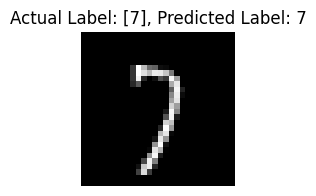

Iteration 1/20 - Test Accuracy: 80.76%


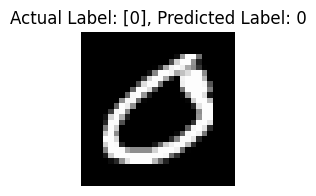

Iteration 2/20 - Test Accuracy: 80.30%


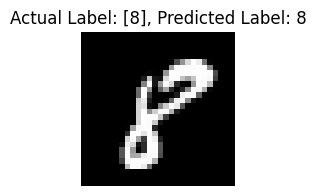

Iteration 3/20 - Test Accuracy: 80.73%


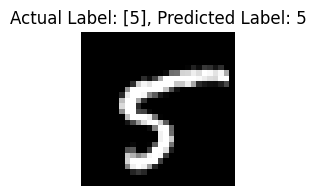

Iteration 4/20 - Test Accuracy: 80.96%


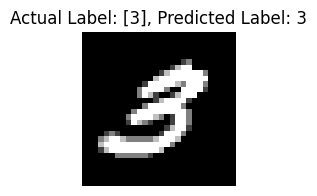

Iteration 5/20 - Test Accuracy: 81.50%


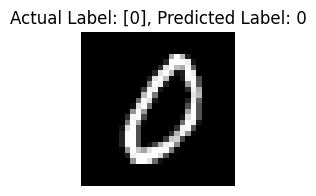

Iteration 6/20 - Test Accuracy: 80.61%


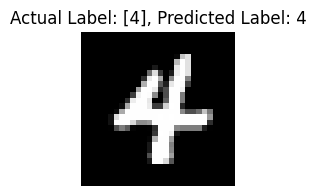

Iteration 7/20 - Test Accuracy: 81.24%


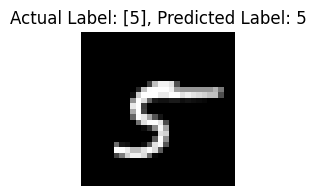

Iteration 8/20 - Test Accuracy: 80.86%


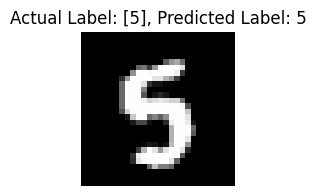

Iteration 9/20 - Test Accuracy: 81.07%


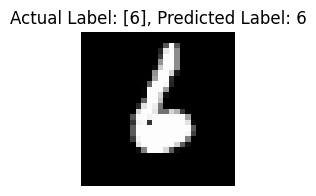

Iteration 10/20 - Test Accuracy: 81.05%


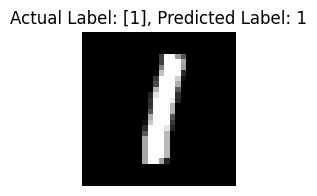

Iteration 11/20 - Test Accuracy: 80.73%


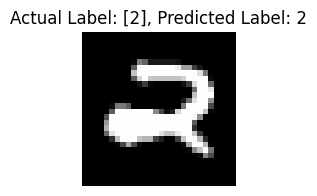

Iteration 12/20 - Test Accuracy: 80.92%


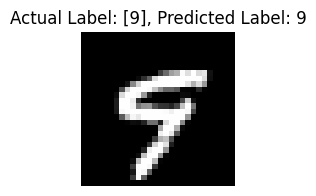

Iteration 13/20 - Test Accuracy: 81.45%


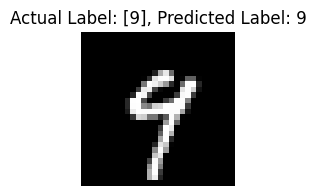

Iteration 14/20 - Test Accuracy: 81.18%


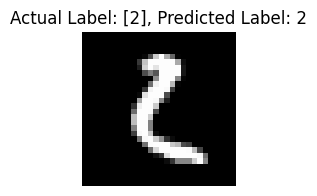

Iteration 15/20 - Test Accuracy: 80.31%


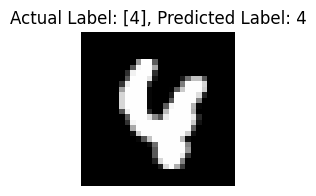

Iteration 16/20 - Test Accuracy: 81.83%


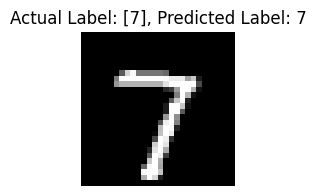

Iteration 17/20 - Test Accuracy: 81.50%


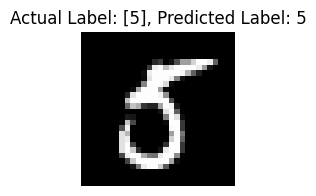

Iteration 18/20 - Test Accuracy: 82.02%


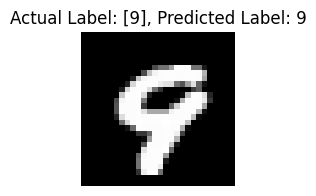

Iteration 19/20 - Test Accuracy: 81.22%


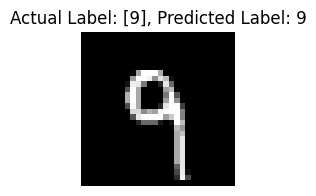

Iteration 20/20 - Test Accuracy: 82.72%


In [233]:
random_sampling_accuracies = []

# Active learning loop for 20 iterations
num_iterations = 20
for iteration in range(num_iterations):
    # Step 1: Randomly select a sample from the unlabeled pool
    random_index = np.random.choice(unlabeled_images.shape[0], 1, replace=False)
    selected_image = unlabeled_images[random_index]
    selected_label = unlabeled_labels[random_index]

    # Step 2: Add the selected sample and its label to the labeled dataset
    initial_images = np.vstack([initial_images, selected_image])
    initial_labels = np.append(initial_labels, selected_label)

    # Step 3: Remove the selected sample and label from the unlabeled pool
    unlabeled_images = np.delete(unlabeled_images, random_index, axis=0)
    unlabeled_labels = np.delete(unlabeled_labels, random_index, axis=0)

    # Step 4: Retrain the model on the updated dataset
    rf_classifier.fit(initial_images, initial_labels)

    # Step 5: Evaluate the model on the test set
    predicted_labels_test = rf_classifier.predict(test_images_flattened)
    accuracy_test = (predicted_labels_test == test_labels).mean()
    random_sampling_accuracies.append(accuracy_test)
    
    # Showing Image with actual label and predicted label
    plt.figure(figsize=(10, 2))
    plt.imshow(selected_image.reshape(28, 28), cmap='gray')
    plt.title(f"Actual Label: {selected_label}, Predicted Label: {rf_classifier.predict(selected_image)[0]}")
    plt.axis('off')
    plt.show()

    # Step 6: Print accuracy after every iteration
    print(f"Iteration {iteration+1}/{num_iterations} - Test Accuracy: {accuracy_test * 100:.2f}%")


In [234]:
unlabeled_images.shape

(59780, 784)

### Task 3: Implement Uncertainty Sampling for Active Learning.

1. Train a Random Forest Classifier (you can use “from sklearn.ensemble import RandomForestClassifier”)  on the initial dataset of 200 samples.

In [235]:
# Randomly select 200 samples from the training set
num_samples = 200
np.random.seed(42)
random_indices = np.random.choice(train_images_flattened.shape[0], num_samples, replace=False)

# Create the initially labeled dataset
initial_images = train_images_flattened[random_indices]
initial_labels = train_labels[random_indices]

# Check the shape of the selected dataset
print(f"Initial labeled dataset shape (images): {initial_images.shape}")
print(f"Initial labeled dataset shape (labels): {initial_labels.shape}")

Initial labeled dataset shape (images): (200, 784)
Initial labeled dataset shape (labels): (200,)


In [236]:
# Create the Unlabeled Pool by excluding the 200 selected samples
unlabeled_images = np.delete(train_images_flattened, random_indices, axis=0)
unlabeled_labels = np.delete(train_labels, random_indices, axis=0)

# Check the shape of the Unlabeled Pool
print(f"Unlabeled Pool shape (images): {unlabeled_images.shape}")
print(f"Unlabeled Pool shape (labels): {unlabeled_labels.shape}")

Unlabeled Pool shape (images): (59800, 784)
Unlabeled Pool shape (labels): (59800,)


In [237]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100)

# Train the model on the initial labeled dataset (200 samples)
rf_classifier.fit(initial_images, initial_labels)

# Predict the labels on the test dataset
predicted_labels_test = rf_classifier.predict(test_images_flattened)

# Calculate the accuracy on the test dataset
accuracy_test = (predicted_labels_test == test_labels).mean()

# Print the accuracy
print(f"Accuracy on Test Set after training on 200 samples: {accuracy_test * 100:.2f}%")

Accuracy on Test Set after training on 200 samples: 80.16%


2. Implement an active learning loop for 20 iterations:
* Compute uncertainty (Label Entropy) for each sample in the unlabeled pool using entropy.
* Select the sample with the highest uncertainty and query its true label.
* Add the queried sample to the labelled dataset and remove it from the unlabelled pool.
* Retrain the model and check the model's accuracy on the test set.
* Print accuracy after every iteration.


In [238]:
# Function to compute the entropy for each sample
def compute_label_entropy(model, unlabeled_images):
    # Get the predicted probabilities for each class (model.predict_proba returns a probability distribution for each class)
    probas = model.predict_proba(unlabeled_images)
    
    # For each sample, calculate entropy
    entropies = []
    for prob in probas:
        entropy = -np.sum(prob * np.log2(prob + 1e-10))  # Adding a small value to avoid log(0)
        entropies.append(entropy)
    
    return np.array(entropies)

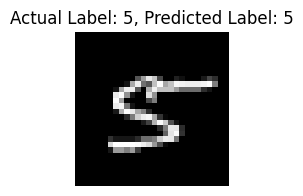

Test Accuracy after iteration 1: 80.58%


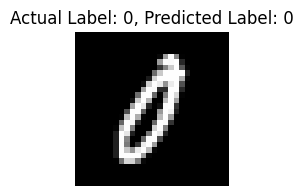

Test Accuracy after iteration 2: 80.95%


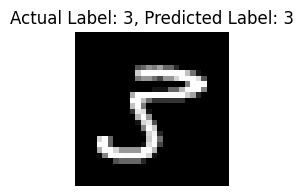

Test Accuracy after iteration 3: 80.96%


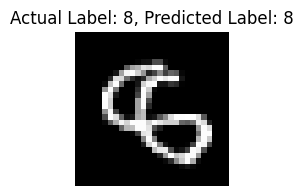

Test Accuracy after iteration 4: 80.88%


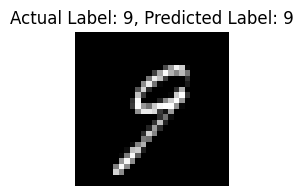

Test Accuracy after iteration 5: 81.15%


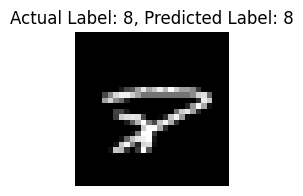

Test Accuracy after iteration 6: 81.33%


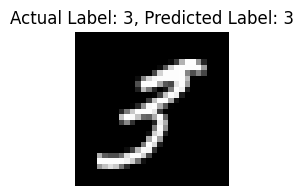

Test Accuracy after iteration 7: 80.31%


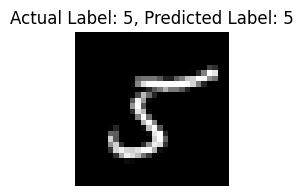

Test Accuracy after iteration 8: 81.80%


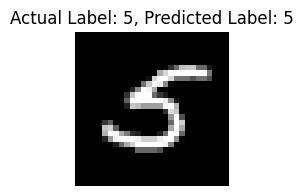

Test Accuracy after iteration 9: 81.99%


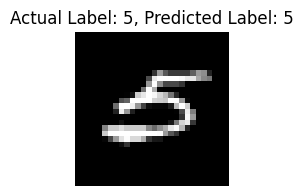

Test Accuracy after iteration 10: 81.76%


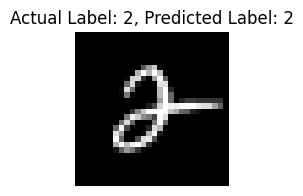

Test Accuracy after iteration 11: 80.99%


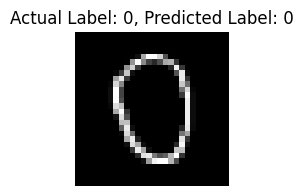

Test Accuracy after iteration 12: 81.69%


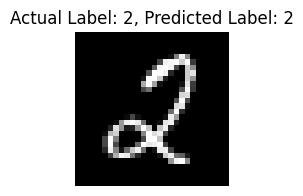

Test Accuracy after iteration 13: 80.98%


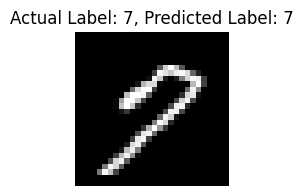

Test Accuracy after iteration 14: 81.44%


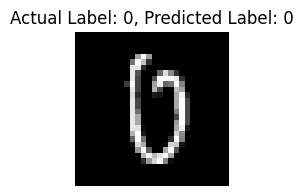

Test Accuracy after iteration 15: 81.76%


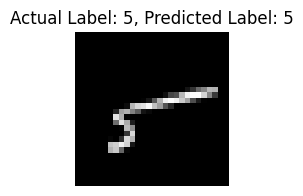

Test Accuracy after iteration 16: 82.43%


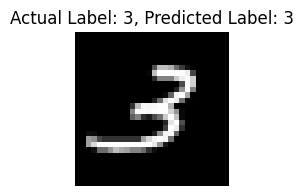

Test Accuracy after iteration 17: 80.34%


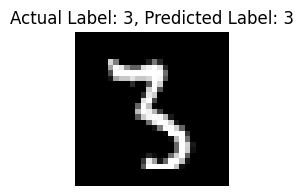

Test Accuracy after iteration 18: 81.75%


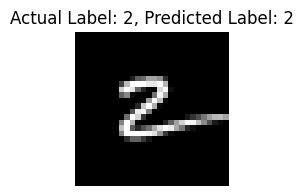

Test Accuracy after iteration 19: 82.36%


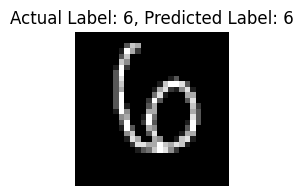

Test Accuracy after iteration 20: 81.96%


In [239]:
uncertainty_sampling_accuracies = []

# Active learning loop for 20 iterations
num_iterations = 20
for iteration in range(num_iterations):
    
    # Step 1: Compute Label Entropy for each sample in the unlabeled pool
    entropies = compute_label_entropy(rf_classifier, unlabeled_images)
    
    # Step 2: Select the sample with the highest entropy (highest uncertainty)
    uncertain_sample_index = np.argmax(entropies)
    selected_image = unlabeled_images[uncertain_sample_index]
    selected_label = unlabeled_labels[uncertain_sample_index]
    
    # Step 3: Add the selected sample and label to the labeled dataset
    initial_images = np.vstack([initial_images, selected_image])
    initial_labels = np.append(initial_labels, selected_label)
    
    # Step 4: Remove the selected sample and label from the unlabeled pool
    unlabeled_images = np.delete(unlabeled_images, uncertain_sample_index, axis=0)
    unlabeled_labels = np.delete(unlabeled_labels, uncertain_sample_index, axis=0)
    
    # Step 5: Retrain the model on the updated labeled dataset
    rf_classifier.fit(initial_images, initial_labels)
    
    # Step 6: Evaluate the model on the test set
    predicted_labels_test = rf_classifier.predict(test_images_flattened)
    accuracy_test = np.mean(test_labels == predicted_labels_test)
    uncertainty_sampling_accuracies.append(accuracy_test)
    
    # Showing Image with actual label and predicted label
    plt.figure(figsize=(10, 2))
    plt.imshow(selected_image.reshape(28, 28), cmap='gray')
    plt.title(f"Actual Label: {selected_label}, Predicted Label: {rf_classifier.predict(selected_image.reshape(1,-1))[0]}")
    plt.axis('off')
    plt.show()
    
    # Step 7: Print the accuracy after every iteration
    print(f"Test Accuracy after iteration {iteration + 1}: {accuracy_test * 100:.2f}%")


### Task 4: Implement Query-by-Committee for Active Learning

In [240]:
# Randomly select 200 samples from the training set
num_samples = 200
np.random.seed(42)
random_indices = np.random.choice(train_images_flattened.shape[0], num_samples, replace=False)

# Create the initially labeled dataset
initial_images = train_images_flattened[random_indices]
initial_labels = train_labels[random_indices]

# Check the shape of the selected dataset
print(f"Initial labeled dataset shape (images): {initial_images.shape}")
print(f"Initial labeled dataset shape (labels): {initial_labels.shape}")

Initial labeled dataset shape (images): (200, 784)
Initial labeled dataset shape (labels): (200,)


In [241]:
# Create the Unlabeled Pool by excluding the 200 selected samples
unlabeled_images = np.delete(train_images_flattened, random_indices, axis=0)
unlabeled_labels = np.delete(train_labels, random_indices, axis=0)

# Check the shape of the Unlabeled Pool
print(f"Unlabeled Pool shape (images): {unlabeled_images.shape}")
print(f"Unlabeled Pool shape (labels): {unlabeled_labels.shape}")

Unlabeled Pool shape (images): (59800, 784)
Unlabeled Pool shape (labels): (59800,)


1. Initialize a committee of 5 Random Forest models, each trained on the initial dataset.


In [242]:
# Number of models in the committee
num_models = 5

# Initialize an empty dictionary to hold the models (the committee)
committee = []

# Initialize and train 5 Random Forest models on the initial dataset
for i in range(1, num_models + 1):
    rf_classifier = RandomForestClassifier(n_estimators=100)
    rf_classifier.fit(initial_images, initial_labels)
    committee.append(rf_classifier)

# Print out the number of models in the committee and their names
print(f"Committee of {len(committee)} Random Forest models initialized and trained:")
for model_name in committee:
    print(f"- {model_name}")


Committee of 5 Random Forest models initialized and trained:
- RandomForestClassifier()
- RandomForestClassifier()
- RandomForestClassifier()
- RandomForestClassifier()
- RandomForestClassifier()


2. In the active learning loop for 20 iterations:
* For each unlabeled sample, compute predictions from all committee members.
* Measure disagreement by calculating Vote Entropy.
* Select the sample with the highest disagreement and query its true label.
* Update the labelled dataset and retrain all models.
* Check the model's accuracy on the test set.
* Print accuracy after every iteration


In [246]:
# Function to compute Vote Entropy for a given set of predictions
def vote_entropy(predictions):
    probability = np.zeros((predictions.shape[0], 10))
    
    for i in range(predictions.shape[0]):
        np.add.at(probability[i], predictions[i], 0.2)
    
    entropies = []
    for prob in probability:
        entropy = -np.sum(prob * np.log2(prob + 1e-10))  # Adding a small value to avoid log(0)
        entropies.append(entropy)

    return entropies

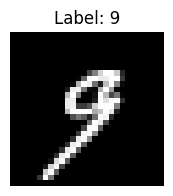

Test Accuracy after iteration 1: 82.02%


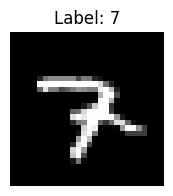

Test Accuracy after iteration 2: 82.09%


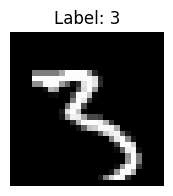

Test Accuracy after iteration 3: 82.31%


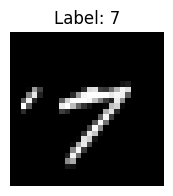

Test Accuracy after iteration 4: 82.35%


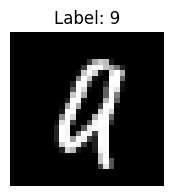

Test Accuracy after iteration 5: 82.08%


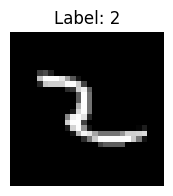

Test Accuracy after iteration 6: 82.06%


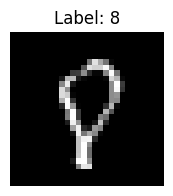

Test Accuracy after iteration 7: 81.88%


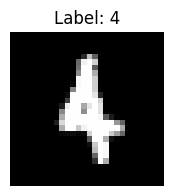

Test Accuracy after iteration 8: 82.23%


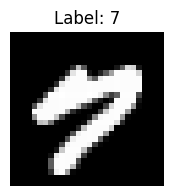

Test Accuracy after iteration 9: 82.42%


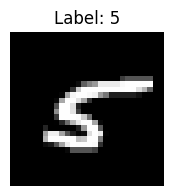

Test Accuracy after iteration 10: 82.57%


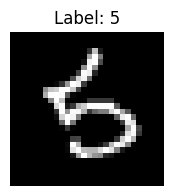

Test Accuracy after iteration 11: 82.46%


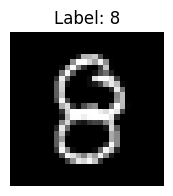

Test Accuracy after iteration 12: 82.09%


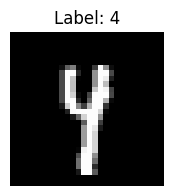

Test Accuracy after iteration 13: 82.61%


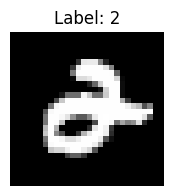

Test Accuracy after iteration 14: 82.43%


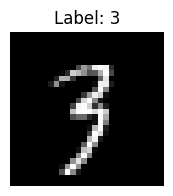

Test Accuracy after iteration 15: 83.03%


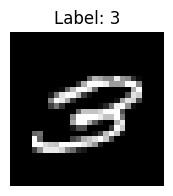

Test Accuracy after iteration 16: 82.73%


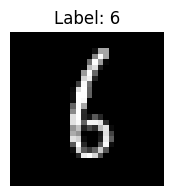

Test Accuracy after iteration 17: 83.40%


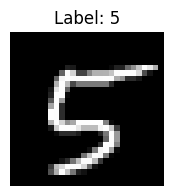

Test Accuracy after iteration 18: 83.43%


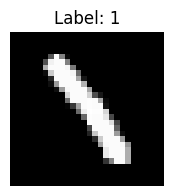

Test Accuracy after iteration 19: 83.32%


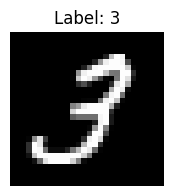

Test Accuracy after iteration 20: 83.66%


In [247]:
# Active learning loop for 20 iterations
num_iterations = 20
committee_sampling_accuracies = []

for iteration in range(num_iterations):
    
    # Step 1: Compute predictions from all committee members for each sample in the unlabeled pool
    committee_predictions = np.array([model.predict(unlabeled_images) for model in committee]).T  # Shape: (num_samples, num_models)
    
    # Step 2: Calculate Vote Entropy for each sample in the unlabeled pool
    vote_entropies = np.array(vote_entropy(committee_predictions))
    
    # Step 3: Select the sample with the highest Vote Entropy (highest disagreement)
    uncertain_sample_index = np.argmax(vote_entropies)
    selected_image = unlabeled_images[uncertain_sample_index]
    selected_label = unlabeled_labels[uncertain_sample_index]
    
    # Step 4: Add the selected sample and its true label to the labeled dataset
    initial_images = np.vstack([initial_images, selected_image])
    initial_labels = np.append(initial_labels, selected_label)
    
    # Step 5: Remove the selected sample and label from the unlabeled pool
    unlabeled_images = np.delete(unlabeled_images, uncertain_sample_index, axis=0)
    unlabeled_labels = np.delete(unlabeled_labels, uncertain_sample_index, axis=0)
    
    # Step 6: Retrain all models in the committee on the updated labeled dataset
    for model in committee:
        model.fit(initial_images, initial_labels)
    
    # Step 7: Evaluate the model on the test set
    test_predictions = np.array([model.predict(test_images_flattened) for model in committee]).T
    test_accuracy = np.mean(np.round(test_predictions.max(axis=1)) == test_labels)  # Average vote from
    committee_sampling_accuracies.append(test_accuracy)
    
    # Showing Image with actual label and predicted label
    plt.figure(figsize=(10, 2))
    plt.imshow(selected_image.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {selected_label}")
    plt.axis('off')
    plt.show()
    
    # Step 8: Print accuracy after every iteration
    print(f"Test Accuracy after iteration {iteration + 1}: {test_accuracy * 100:.2f}%")

### Task 5 : Evaluation & Report

* Compare the final model accuracy across all three strategies.
* Plots the graph of accuracies for all three methods for 20 iterations.
* Analyze which method leads to the most cost-effective improvement in accuracy.
* Discuss findings and limitations in a brief report.

* The final model accuracies for the three active learning strategies are as follows:

1. Random Sampling: 82.72%
2. Uncertainty Sampling: 81.96%
3. Query-by-Committee: 83.66%

From this, it is evident that Query-by-Committee yields the highest accuracy (83.66%), followed by Random Sampling (82.72%), and Uncertainty Sampling (81.96%).

1. Random Sampling
* This method uses random data points for labeling, which is simple but doesn’t prioritize based on uncertainty or disagreement among models.

2. Uncertainty Sampling
* This approach focuses on selecting the data points where the model is most uncertain (e.g., those near the decision boundary). This method improves accuracy by addressing the areas where the model is less confident.

3. Query-by-Committee
* This method uses a committee of models (often differing in structure or initialization) to select data points that generate the most disagreement among the models. By focusing on the most debated samples, it improves the model's accuracy more effectively.

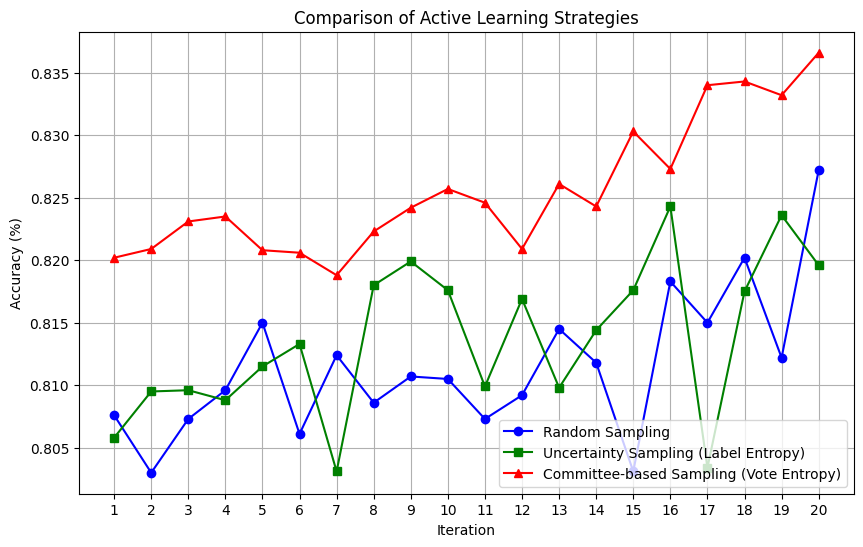

In [248]:
# Plotting the results
iterations = np.arange(1, 21)

plt.figure(figsize=(10, 6))
plt.plot(iterations, random_sampling_accuracies, label="Random Sampling", marker='o', linestyle='-', color='blue')
plt.plot(iterations, uncertainty_sampling_accuracies, label="Uncertainty Sampling (Label Entropy)", marker='s', linestyle='-', color='green')
plt.plot(iterations, committee_sampling_accuracies, label="Committee-based Sampling (Vote Entropy)", marker='^', linestyle='-', color='red')

plt.xlabel('Iteration')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Active Learning Strategies')
plt.legend(loc="lower right")
plt.grid(True)
plt.xticks(iterations)
plt.show()

### Cost-effectiveness analysis:

To determine which method provides the most cost-effective improvement, we must consider the trade-off between accuracy and computational or labeling cost, as each method likely involves different levels of resource expenditure.

1. Random Sampling is typically the simplest and least computationally expensive method. However, it produces a relatively high accuracy at 82.72%, making it a reasonable choice if minimizing costs is a priority.

2. Uncertainty Sampling, while slightly lower in accuracy (81.96%), focuses on selecting the data points that the model is most uncertain about. This can sometimes lead to more efficient learning, but in this case, it doesn't perform better than Random Sampling in terms of accuracy, and the additional complexity might not justify its marginal benefit.

3. Query-by-Committee shows the highest accuracy (83.66%), but it involves more computational effort, as it requires maintaining multiple models and evaluating their disagreement on data points. The increased complexity and resource usage may lead to higher costs, making this strategy less cost-effective compared to Random Sampling, especially when only small improvements in accuracy are needed.

### Findings and Limitations

1. Findings:

* Query-by-Committee provides the highest accuracy but at the cost of greater computational resources.
* Random Sampling achieves a competitive accuracy with minimal computational cost, making it a strong choice for scenarios with limited resources.
* Uncertainty Sampling does not outperform the other strategies in terms of accuracy, suggesting it might not be as effective in this specific context.

2. Limitations:

* The results do not consider the full range of potential costs (e.g., data acquisition, time for model retraining, or the complexity of implementing these strategies).
* The analysis assumes that accuracy is the primary measure of model success. In some cases, other factors like interpretability, stability, or robustness could also be crucial.
* This comparison might be influenced by the specific dataset and task. Other datasets or problems might yield different results regarding which strategy is most effective.

### Conclusion

In conclusion, Query-by-Committee provides the highest accuracy (83.66%) among the three strategies, but it requires significantly more computational resources, making it potentially less cost-effective for scenarios with limited resources. Random Sampling offers a competitive accuracy (82.72%) with minimal cost, making it the most practical and cost-efficient choice in many cases. Uncertainty Sampling, despite its potential to focus on uncertain data points, did not outperform the other methods in terms of accuracy (81.96%) in this study, suggesting it may not offer substantial benefits for the given task.

Ultimately, if maximizing accuracy is the priority and resources are available, Query-by-Committee would be the best option. However, for a more resource-constrained environment, Random Sampling strikes a balance between performance and cost-efficiency.